In [4]:
!python demo/image_demo.py demo/demo.png configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth --device cpu --out-file result.jpg

Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


d:\python\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\python\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
c:\Users\lhl\anaconda3\envs\py\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [ ]:
from mmseg.apis import inference_model, init_model, show_result_pyplot
import mmcv

config_file = 'zzz\pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = 'zzz\pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
# checkpoint_file = None

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cpu')

# test a single image and show the results
img = 'demo/demo.png'  # or img = mmcv.imread(img), which will only load it once
result = inference_model(model, img)
# visualize the results in a new window
# show_result_pyplot(model, img, result, show=True)
# # or save the visualization results to image files
# # you can change the opacity of the painted segmentation map in (0, 1].
show_result_pyplot(model, img, result, show=True, out_file='zzz/result.jpg', opacity=0.5)
# # test a video and show the results
# video = mmcv.VideoReader('video.mp4')
# for frame in video:
#    result = inference_model(model, frame)
#    show_result_pyplot(model, frame, result, wait_time=1)

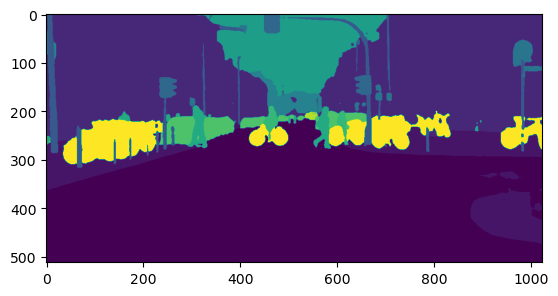

In [13]:
# draw torch.Size([1, 512, 1024]) use plt
import matplotlib.pyplot as plt
import numpy as np
tensor = result.pred_sem_seg.data.cpu().numpy()
tensor = tensor.squeeze()
tensor = tensor.astype(np.uint8)
# tensor = tensor.transpose(1, 0)
plt.imshow(tensor)
plt.show()